In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [21]:
import torch
import torch.nn
from PIL import Image
import numpy as np

from torchvision import transforms, utils

In [4]:
from src import s3_utils, io_utils
from src.nn.dataset import TileDataset

In [8]:
s3_key = 'deep-azulejo/synthetic_dataset_20200919'

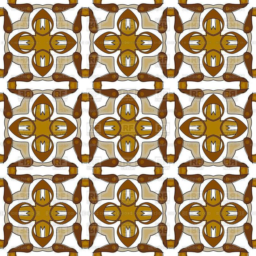

In [5]:
img = s3_utils.read_image_from_s3('deep-azulejo/synthetic_dataset_20200919/'
                                  '020ef1a3-ee25-45d5-8c5f-4f460f750f6f/'
                                  '1d25df52-ddb2-4aaf-bf37-db318ad7a4e3.jpg')
PIL_image = Image.fromarray(img)
transforms.Resize((256, 256))(PIL_image)

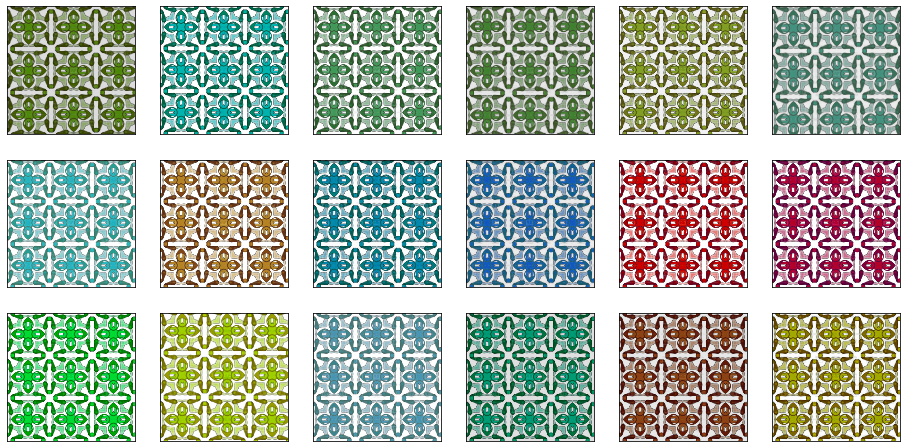

In [16]:
tfms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ColorJitter(brightness=0.15, contrast=0.25, saturation=0.5, hue=0.5),
    transforms.RandomChoice([
#         transforms.RandomRotation(1),
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomVerticalFlip(0.5),
        transforms.RandomResizedCrop((256, 256), scale=(0.9, 1)),
    ])
])

io_utils.plot_sample_imgs(
    [tfms(PIL_image) for _ in range(18)]
)

In [19]:
%%time
dataset = TileDataset(s3_key=s3_key, transform=tfms)

CPU times: user 1min 7s, sys: 548 ms, total: 1min 8s
Wall time: 6min 19s


CPU times: user 14.4 ms, sys: 62 µs, total: 14.4 ms
Wall time: 50.7 ms


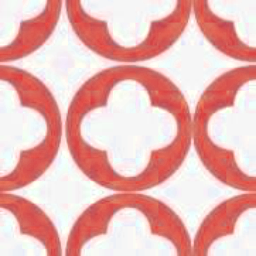

In [20]:
%%time
dataset[0]

In [ ]:
%%time
io_utils.plot_sample_imgs([dataset[i] for i in np.random.choice(len(dataset), 18)])